Práctica de Machine Learning - MATIAS CAVALLO - Predicción del precio de alojamientos de Airbnb.

Voy a hacer un análisis exploratorio del dataset de Airbnb para predecir precios de alojamientos.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


Carga de datos y exploración inicial


In [2]:
airbnb_data = pd.read_csv('airbnb-listings-extract.csv', sep=';', low_memory=False)

print('Dimensiones del dataset:', airbnb_data.shape)
print('Número de filas:', airbnb_data.shape[0])
print('Número de columnas:', airbnb_data.shape[1])


Dimensiones del dataset: (14780, 89)
Número de filas: 14780
Número de columnas: 89


In [3]:
# Como en el curso de SQL, mejor ver algunas filas para entender mejor la logica del dataset
airbnb_data.head(5).T


,0,1,2,3,4
ID,11210388,17471131,17584891,5398030,18104606
Listing Url,https://www.airbnb.com/rooms/11210388,https://www.airbnb.com/rooms/17471131,https://www.airbnb.com/rooms/17584891,https://www.airbnb.com/rooms/5398030,https://www.airbnb.com/rooms/18104606
Scrape ID,20170306202425,20170407214050,20170407214050,20170407214050,20170407214050
Last Scraped,2017-03-07,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,The Loft-Full Bath-Deck w/View,"Claris I, Friendly Rentals","Style Terrace Red, Friendly Rentals",Picasso Suite 1.4 Paseo de Gracia,Smart City Centre Apartment II
...,...,...,...,...,...
Cancellation Policy,moderate,super_strict_30,super_strict_30,strict,flexible
Calculated host listings count,1.0,106.0,106.0,24.0,92.0
Reviews per Month,3.5,0.86,NaN,1.09,NaN
Geolocation,"30.3373609355,-97.8632766782","41.3896829422,2.17262543017","41.3930345489,2.16217327868","41.3969668101,2.1674178103","41.3886851936,2.15514963616"


Como el dataset tiene muchas columnas, me enfoco en seleccionar las variables que tienen sentido para el análisis.


In [4]:

columnas_interes= [
    'Property Type',      
    'Room Type',          
    'Accommodates',        
    'Bathrooms',          
    'Bedrooms',           
    'Beds',               
    'Bed Type',          
    'Price',              
    'Guests Included',    
    'Extra People',       
    'Minimum Nights',     
    'Number of Reviews', 
    'Review Scores Rating',        
    'Review Scores Cleanliness',   
    'Review Scores Checkin',       
    'Review Scores Communication', 
    'Review Scores Location',      
    'Review Scores Value',        
    'Cancellation Policy', 
    'City'                
]

# nuevo dataframe con estas columnas
airbnb_data = airbnb_data[columnas_interes].copy()
print('Nuevo dataset:', airbnb_data.shape)
airbnb_data.head()


Nuevo dataset: (14780, 20)


,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Guests Included,Extra People,Minimum Nights,Number of Reviews,Review Scores Rating,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,City
0,Loft,Entire home/apt,2,1.0,1.0,1.0,Real Bed,58.0,1,0,2,42,98.0,10.0,10.0,10.0,10.0,10.0,moderate,Austin
1,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,70.0,2,44,1,1,80.0,10.0,10.0,10.0,8.0,10.0,super_strict_30,Barcelona
2,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,70.0,2,42,1,0,NaN,NaN,NaN,NaN,NaN,NaN,super_strict_30,Barcelona
3,Apartment,Entire home/apt,8,2.0,3.0,4.0,Real Bed,229.0,2,39,2,13,92.0,9.0,10.0,10.0,10.0,9.0,strict,Barcelona
4,Apartment,Entire home/apt,5,1.0,2.0,2.0,Real Bed,149.0,1,0,2,0,NaN,NaN,NaN,NaN,NaN,NaN,flexible,Barcelona


Limpieza de datos


In [5]:
# Primero vemos si hay valores nulos o missing
print("Valores nulos por columna:")
print(airbnb_data.isnull().sum())

print("\nPorcentaje de nulos:")
porcentaje_nulos = (airbnb_data.isnull().sum() / len(airbnb_data)) * 100
print(porcentaje_nulos.round(2))


Valores nulos por columna:
Property Type                     0
Room Type                         0
Accommodates                      0
Bathrooms                        55
Bedrooms                         25
Beds                             49
Bed Type                          0
Price                            17
Guests Included                   0
Extra People                      0
Minimum Nights                    0
Number of Reviews                 0
Review Scores Rating           3304
Review Scores Cleanliness      3320
Review Scores Checkin          3337
Review Scores Communication    3320
Review Scores Location         3340
Review Scores Value            3341
Cancellation Policy               0
City                              6
dtype: int64

Porcentaje de nulos:
Property Type                   0.00
Room Type                       0.00
Accommodates                    0.00
Bathrooms                       0.37
Bedrooms                        0.17
Beds                            0

In [6]:
# Veo que price y extra people vienen como string, y necesto convertirlos a números para poder trabajar. Además, eliminamos las filas donde Price es nulo o cero

def limpiar_precio(precio):
    if pd.isna(precio):
        return np.nan
    
    precio_limpio = str(precio).replace('$', '').replace(',', '')
    try:
        return float(precio_limpio)
    except:
        return np.nan

airbnb_data['Price'] = airbnb_data['Price'].apply(limpiar_precio)
airbnb_data['Extra People'] = airbnb_data['Extra People'].apply(limpiar_precio)


airbnb_data = airbnb_data[airbnb_data['Price'].notna()]
airbnb_data = airbnb_data[airbnb_data['Price'] > 0]

print('Dataset después de limpiar precios:', airbnb_data.shape)


Dataset después de limpiar precios: (14763, 20)


In [7]:
# Tengo que arreglar los valores nulos.
# Para variables numéricas uso la mediana 
airbnb_data['Bathrooms'].fillna(airbnb_data['Bathrooms'].median(), inplace=True)
airbnb_data['Bedrooms'].fillna(airbnb_data['Bedrooms'].median(), inplace=True)
airbnb_data['Beds'].fillna(airbnb_data['Beds'].median(), inplace=True)

# Para las puntuaciones de reviews, uso la media
airbnb_data['Review Scores Rating'].fillna(airbnb_data['Review Scores Rating'].mean(), inplace=True)
airbnb_data['Review Scores Cleanliness'].fillna(airbnb_data['Review Scores Cleanliness'].mean(), inplace=True)
airbnb_data['Review Scores Checkin'].fillna(airbnb_data['Review Scores Checkin'].mean(), inplace=True)
airbnb_data['Review Scores Communication'].fillna(airbnb_data['Review Scores Communication'].mean(), inplace=True)
airbnb_data['Review Scores Location'].fillna(airbnb_data['Review Scores Location'].mean(), inplace=True)
airbnb_data['Review Scores Value'].fillna(airbnb_data['Review Scores Value'].mean(), inplace=True)

# Para variables categóricas (texto), uso la moda
airbnb_data['Property Type'].fillna(airbnb_data['Property Type'].mode()[0], inplace=True)
airbnb_data['Room Type'].fillna(airbnb_data['Room Type'].mode()[0], inplace=True)
airbnb_data['Bed Type'].fillna(airbnb_data['Bed Type'].mode()[0], inplace=True)
airbnb_data['Cancellation Policy'].fillna(airbnb_data['Cancellation Policy'].mode()[0], inplace=True)
airbnb_data['City'].fillna(airbnb_data['City'].mode()[0], inplace=True)

# Verifico que ya no haya nulos
print("Valores nulos después de la limpieza:")
print(airbnb_data.isnull().sum())


Valores nulos después de la limpieza:
Property Type                  0
Room Type                      0
Accommodates                   0
Bathrooms                      0
Bedrooms                       0
Beds                           0
Bed Type                       0
Price                          0
Guests Included                0
Extra People                   0
Minimum Nights                 0
Number of Reviews              0
Review Scores Rating           0
Review Scores Cleanliness      0
Review Scores Checkin          0
Review Scores Communication    0
Review Scores Location         0
Review Scores Value            0
Cancellation Policy            0
City                           0
dtype: int64


Análisis Exploratorio


In [8]:
# Estadísticas descriptivas para hacerme una idea de los datos
airbnb_data.describe()


,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Minimum Nights,Number of Reviews,Review Scores Rating,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value
count,14763.000000,14763.000000,14763.000000,14763.000000,14763.000000,14763.000000,14763.000000,14763.000000,14763.000000,14763.000000,14763.000000,14763.000000,14763.000000,14763.000000,14763.000000
mean,3.274334,1.279381,1.341665,2.041929,73.561471,1.589040,7.588498,3.050667,22.647836,91.695474,9.328705,9.621917,9.647280,9.532062,9.217935
std,2.092835,0.653767,0.896282,1.605333,72.062050,1.176927,11.599172,12.273346,38.305035,7.923076,0.872076,0.706318,0.675122,0.681595,0.836608
min,1.000000,0.000000,0.000000,1.000000,9.000000,0.000000,0.000000,1.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,34.000000,1.000000,0.000000,1.000000,1.000000,90.000000,9.000000,9.621917,9.647280,9.000000,9.000000
50%,3.000000,1.000000,1.000000,2.000000,55.000000,1.000000,0.000000,2.000000,7.000000,91.695474,9.328705,10.000000,10.000000,10.000000,9.217935
75%,4.000000,1.000000,2.000000,2.000000,86.000000,2.000000,15.000000,3.000000,27.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,16.000000,8.000000,10.000000,16.000000,999.000000,16.000000,276.000000,1125.000000,446.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000


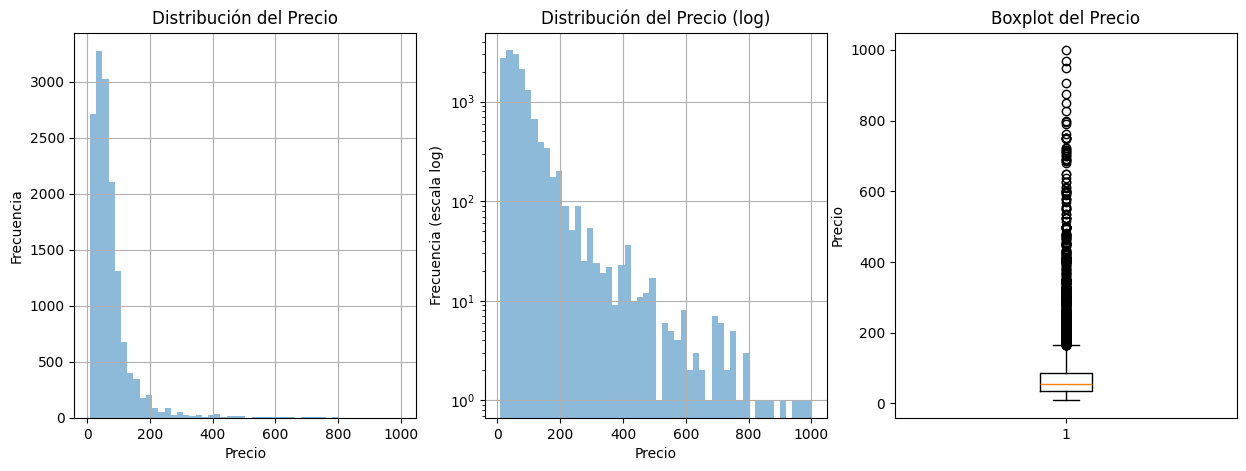

In [9]:
# Visualizo la distribución del precio y configuro un histograma normal
plt.figure(figsize=(15, 5))



plt.subplot(1, 3, 1)
airbnb_data['Price'].plot.hist(alpha=0.5, bins=50, grid=True)
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Distribución del Precio')

# Histograma con escala logarítmica para ver mejor los outliers
plt.subplot(1, 3, 2)
airbnb_data['Price'].plot.hist(alpha=0.5, bins=50, grid=True)
plt.yscale('log')
plt.xlabel('Precio')
plt.ylabel('Frecuencia (escala log)')
plt.title('Distribución del Precio (log)')

# Boxplot para ver outliers
plt.subplot(1, 3, 3)
plt.boxplot(airbnb_data['Price'])
plt.ylabel('Precio')
plt.title('Boxplot del Precio')

plt.show()


In [10]:
# Veo que hay outliers extremos en los precios, elimino los que están por encima del 99%, solo tendré 1 % de datos perdidos


percentil_99 = airbnb_data['Price'].quantile(0.99)
print('Percentil 99 del precio:', percentil_99)

# Filtro el dataset
airbnb_data_clean = airbnb_data[airbnb_data['Price'] <= percentil_99].copy()

print('Registros eliminados:', len(airbnb_data) - len(airbnb_data_clean))
print('Dataset final:', airbnb_data_clean.shape)


Percentil 99 del precio: 405.0
Registros eliminados: 144
Dataset final: (14619, 20)


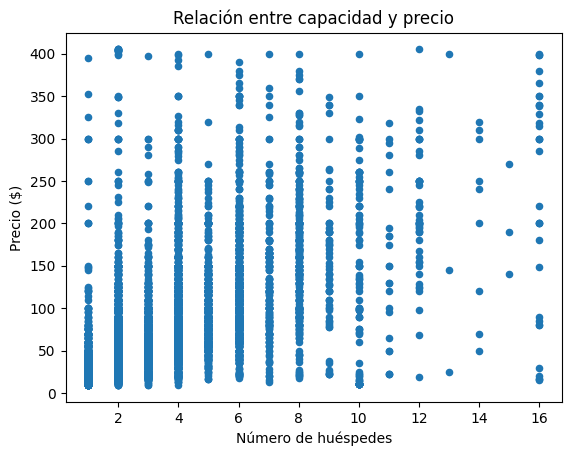

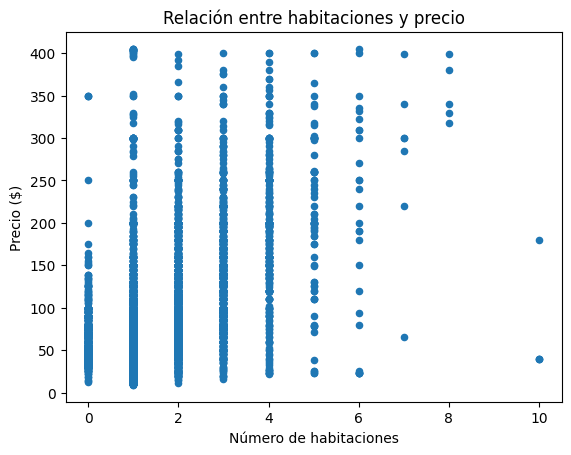

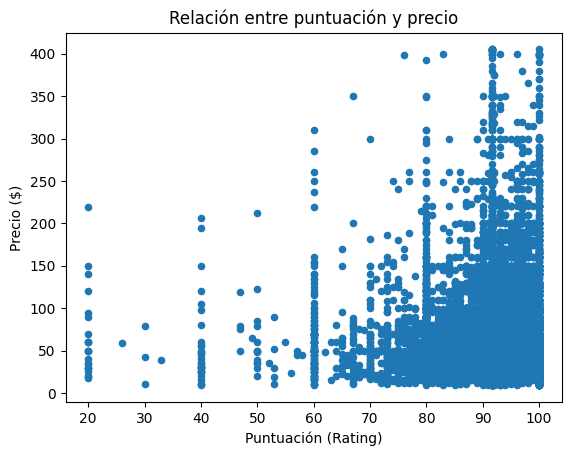

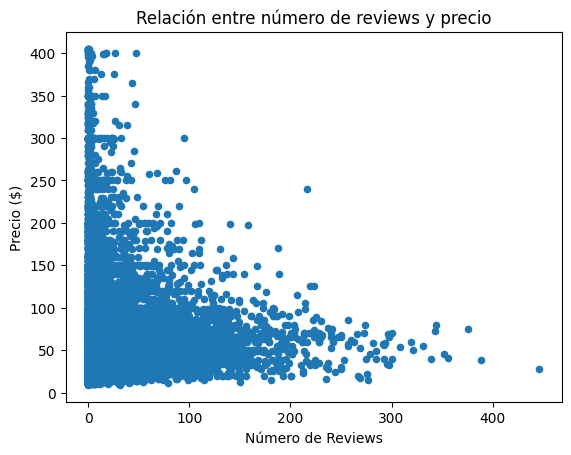

In [11]:
# Ahora hago scatter plots para ver cómo se relacionan las variables con el precio, me baso en el ejemplo de King County

# Accommodates vs Price
airbnb_data_clean.plot(kind='scatter', x='Accommodates', y='Price')
plt.xlabel('Número de huéspedes')
plt.ylabel('Precio ($)')
plt.title('Relación entre capacidad y precio')
plt.show()

# Bedrooms vs Price
airbnb_data_clean.plot(kind='scatter', x='Bedrooms', y='Price')
plt.xlabel('Número de habitaciones')
plt.ylabel('Precio ($)')
plt.title('Relación entre habitaciones y precio')
plt.show()

# Review Score vs Price
airbnb_data_clean.plot(kind='scatter', x='Review Scores Rating', y='Price')
plt.xlabel('Puntuación (Rating)')
plt.ylabel('Precio ($)')
plt.title('Relación entre puntuación y precio')
plt.show()

# Number of Reviews vs Price
airbnb_data_clean.plot(kind='scatter', x='Number of Reviews', y='Price')
plt.xlabel('Número de Reviews')
plt.ylabel('Precio ($)')
plt.title('Relación entre número de reviews y precio')
plt.show()


Preparación de datos para modelado


In [12]:
# Las variables string las convierto a números, uso Label Encoding

from sklearn.preprocessing import LabelEncoder

# Hago una copia para no modificar el original
data_modelo = airbnb_data_clean.copy()

# Lista de variables string
categoricas = ['Property Type', 'Room Type', 'Bed Type', 'Cancellation Policy', 'City']

# Codifico cada una
for col in categoricas:
    le = LabelEncoder()
    data_modelo[col] = le.fit_transform(data_modelo[col].astype(str))

print("Variables categóricas codificadas a números")
data_modelo.head()


Variables categóricas codificadas a números


,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Guests Included,Extra People,Minimum Nights,Number of Reviews,Review Scores Rating,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,City
0,15,0,2,1.0,1.0,1.0,4,58.0,1,0.0,2,42,98.000000,10.000000,10.000000,10.00000,10.000000,10.000000,2,11
1,0,0,4,1.0,1.0,1.0,4,70.0,2,44.0,1,1,80.000000,10.000000,10.000000,10.00000,8.000000,10.000000,6,14
2,0,0,4,1.0,1.0,1.0,4,70.0,2,42.0,1,0,91.695474,9.328705,9.621917,9.64728,9.532062,9.217935,6,14
3,0,0,8,2.0,3.0,4.0,4,229.0,2,39.0,2,13,92.000000,9.000000,10.000000,10.00000,10.000000,9.000000,4,14
4,0,0,5,1.0,2.0,2.0,4,149.0,1,0.0,2,0,91.695474,9.328705,9.621917,9.64728,9.532062,9.217935,0,14


In [13]:
# Ahora veo el mapeo de string a número para entender la lógica

print("=" * 60)
print("MAPEO DE CATEGORÍAS (String → Número)")
print("=" * 60)

# Recreo los LabelEncoder para cada columna para ver el mapeo
categorias = ['Property Type', 'Room Type', 'Bed Type', 'Cancellation Policy', 'City']

# Pero primero cargo los datos originales sin codificar
temp_data = airbnb_data_clean.copy()

for col in categorias:
    print(f"\n{col}:")
    le = LabelEncoder()
    le.fit(temp_data[col].astype(str))
    for i, clase in enumerate(le.classes_):
        print(f"  {i} = {clase}")


MAPEO DE CATEGORÍAS (String → Número)

Property Type:
  0 = Apartment
  1 = Bed & Breakfast
  2 = Boat
  3 = Boutique hotel
  4 = Bungalow
  5 = Camper/RV
  6 = Casa particular
  7 = Chalet
  8 = Condominium
  9 = Dorm
  10 = Earth House
  11 = Guest suite
  12 = Guesthouse
  13 = Hostel
  14 = House
  15 = Loft
  16 = Other
  17 = Serviced apartment
  18 = Tent
  19 = Timeshare
  20 = Townhouse
  21 = Villa

Room Type:
  0 = Entire home/apt
  1 = Private room
  2 = Shared room

Bed Type:
  0 = Airbed
  1 = Couch
  2 = Futon
  3 = Pull-out Sofa
  4 = Real Bed

Cancellation Policy:
  0 = flexible
  1 = flexible_new
  2 = moderate
  3 = moderate_new
  4 = strict
  5 = strict_new
  6 = super_strict_30
  7 = super_strict_60

City:
  0 = Alaró
  1 = Alcudia
  2 = Alcúdia
  3 = Algaida
  4 = Amsterdam
  5 = Antwerpen
  6 = Aravaca
  7 = Aravaca (Madrid)
  8 = Ariany
  9 = Athens
  10 = Athina
  11 = Austin
  12 = Balearic Islands
  13 = Ballsbridge
  14 = Barcelona
  15 = Berlin
  16 = Berlí

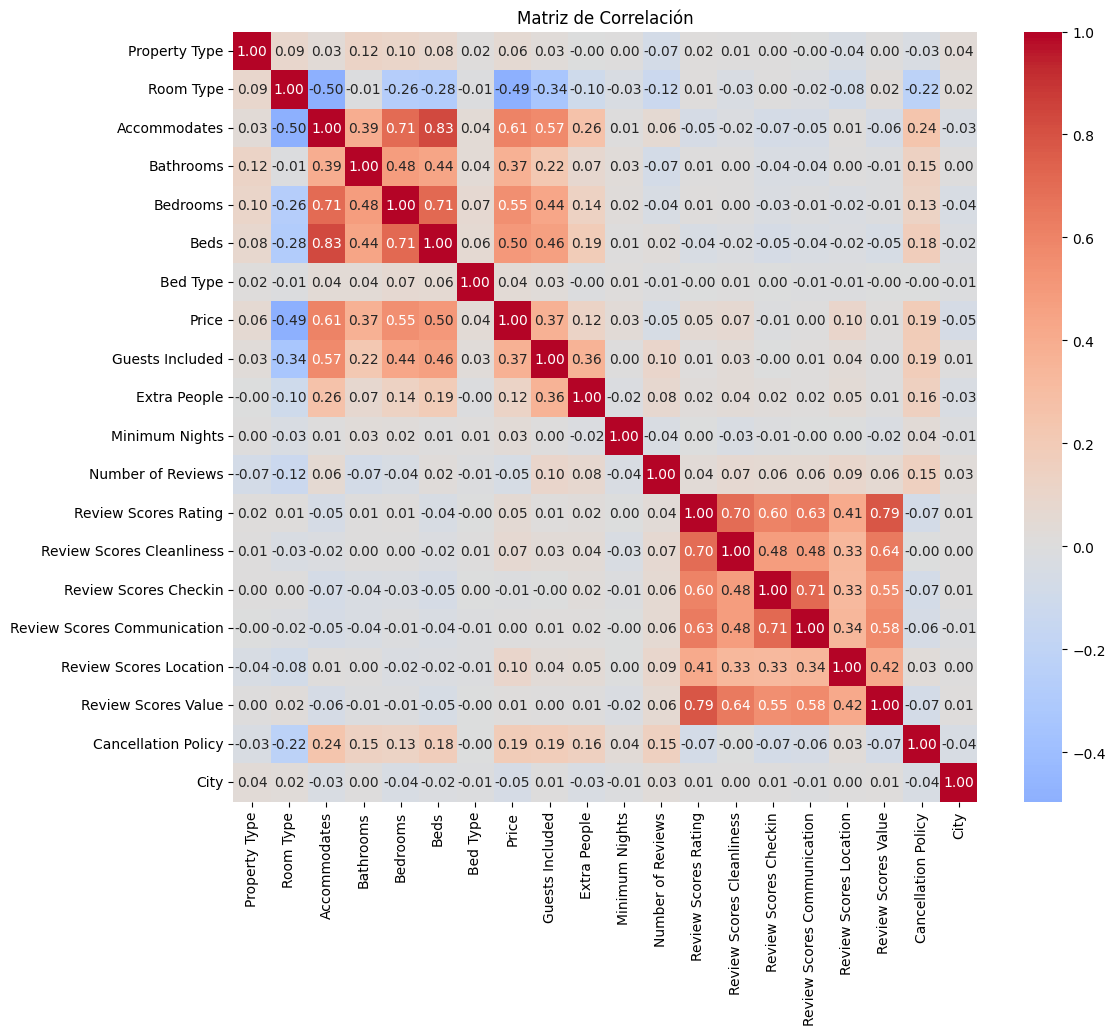


Correlación de cada variable con el Precio (ordenado):
Price                          1.000000
Accommodates                   0.606051
Bedrooms                       0.547783
Beds                           0.499644
Guests Included                0.373691
Bathrooms                      0.372789
Cancellation Policy            0.189276
Extra People                   0.122797
Review Scores Location         0.097020
Review Scores Cleanliness      0.069609
Property Type                  0.064456
Review Scores Rating           0.051380
Bed Type                       0.042241
Minimum Nights                 0.032369
Review Scores Value            0.007981
Review Scores Communication    0.002757
Review Scores Checkin         -0.012940
Number of Reviews             -0.050363
City                          -0.053070
Room Type                     -0.490691
Name: Price, dtype: float64


In [14]:
# Ahora veo la correlación entre variables 
import seaborn as sns

# Calculo la matriz de correlación y visualizo con un heatmap
corr_matrix = data_modelo.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

# Veo qué variables están más correlacionadas con el precio
print("\nCorrelación de cada variable con el Precio (ordenado):")
print(corr_matrix['Price'].sort_values(ascending=False))


División train/test y normalización


In [15]:
from sklearn.model_selection import train_test_split

# Separo las características (X) de la variable objetivo (y)
X = data_modelo.drop('Price', axis=1)  
y = data_modelo['Price']                

# Divido en train y test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

print('datos de entrenamiento:', X_train.shape)
print('datos de test:', X_test.shape)

# normalizo los datos 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)      # aprendo de train
X_test_scaled = scaler.transform(X_test)            # aplico lo mismo a test

print("datos normalizados (media=0, std=1)")


datos de entrenamiento: (11695, 19)
datos de test: (2924, 19)
datos normalizados (media=0, std=1)


Modelado

Probamos diferentes modelos, de mas simple a más complejo:
- Regresión Lineal
- Lasso
- Árbol de Decisión  
- Random Forest


In [16]:
# REGRESIÓN LINEAL
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Creo y entreno el modelo
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Hago predicciones
y_train_pred_lr = lr.predict(X_train_scaled)
y_test_pred_lr = lr.predict(X_test_scaled)

# Calculo las métricas
mse_train_lr = mean_squared_error(y_train, y_train_pred_lr)
mse_test_lr = mean_squared_error(y_test, y_test_pred_lr)
rmse_train_lr = np.sqrt(mse_train_lr)
rmse_test_lr = np.sqrt(mse_test_lr)
r2_train_lr = r2_score(y_train, y_train_pred_lr)
r2_test_lr = r2_score(y_test, y_test_pred_lr)

print("=" * 50)
print("REGRESIÓN LINEAL")
print("=" * 50)
print("TRAIN:")
print("  MSE:", mse_train_lr)
print("  RMSE:", rmse_train_lr)
print("  R2:", r2_train_lr)
print("\nTEST:")
print("  MSE:", mse_test_lr)
print("  RMSE:", rmse_test_lr)
print("  R2:", r2_test_lr)


REGRESIÓN LINEAL
TRAIN:
  MSE: 1448.8869020712336
  RMSE: 38.06424703144978
  R2: 0.5003251141838504

TEST:
  MSE: 1294.7405783230072
  RMSE: 35.98250378062937
  R2: 0.4978809717963425


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................alpha=0.018329807108324356; total time=   0.0s
[CV] END .........................alpha=0.018329807108324356; total time=   0.0s
[CV] END .........................alpha=0.018329807108324356; total time=   0.0s
[CV] END ..........................alpha=0.03359818286283781; total time=   0.0s
[CV] END ..........................alpha=0.03359818286283781; total time=   0.0s
[CV] END ..........................alpha=0.03359818286283781; total time=   0.0s
[CV] END ..........................alpha=0.06158482110660264; total time=   0.0s
[CV] END ..........................alpha=0.06158482110660264; total time=   0.0s
[CV] END ..........................alpha=0.06158

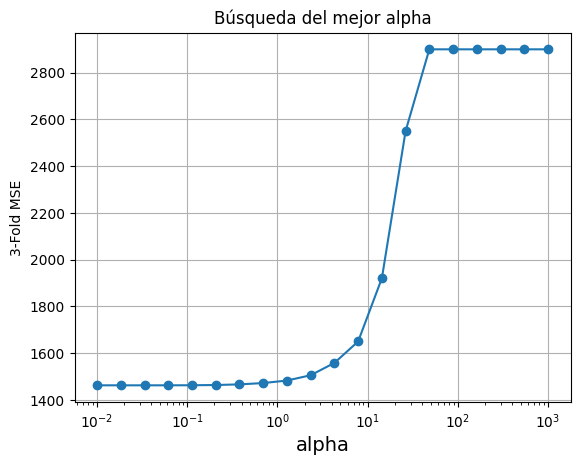

LASSO
TRAIN:
  MSE: 1448.929055085755
  RMSE: 38.064800736188744
  R2: 0.5003105769534513

TEST:
  MSE: 1294.04930298283
  RMSE: 35.97289678331216
  R2: 0.4981490583210426


In [17]:
# LASSO  - basicamente regresión con regularización
# Uso GridSearchCV para encontrar el mejor valor de alpha

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Defino el rango de alphas a probar 
alpha_vector = np.logspace(-2, 3, 20)
param_grid = {'alpha': alpha_vector}

# GridSearchCV con 3-Fold Cross Validation
grid = GridSearchCV(Lasso(max_iter=10000), 
                    param_grid=param_grid, 
                    cv=3, 
                    scoring='neg_mean_squared_error',
                    verbose=2)

grid.fit(X_train_scaled, y_train)

print("Mejor alpha encontrado:", grid.best_params_)
print("Mejor score (MSE):", grid.best_score_)

# Visualizo cómo varía el error con alpha. uso menos uno -1 porque está negado
scores = -1 * grid.cv_results_['mean_test_score']  
plt.semilogx(alpha_vector, scores, '-o')
plt.xlabel('alpha', fontsize=14)
plt.ylabel('3-Fold MSE')
plt.title('Búsqueda del mejor alpha')
plt.grid(True)
plt.show()

# Ahora evalúo el modelo Lasso con el mejor alpha
alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha=alpha_optimo, max_iter=10000)
lasso.fit(X_train_scaled, y_train)

# Predicciones
y_train_pred_lasso = lasso.predict(X_train_scaled)
y_test_pred_lasso = lasso.predict(X_test_scaled)

# Métricas
mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)
mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)
rmse_train_lasso = np.sqrt(mse_train_lasso)
rmse_test_lasso = np.sqrt(mse_test_lasso)
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

print("=" * 50)
print("LASSO")
print("=" * 50)
print("TRAIN:")
print("  MSE:", mse_train_lasso)
print("  RMSE:", rmse_train_lasso)
print("  R2:", r2_train_lasso)
print("\nTEST:")
print("  MSE:", mse_test_lasso)
print("  RMSE:", rmse_test_lasso)
print("  R2:", r2_test_lasso)


In [18]:
# ÁRBOL DE DECISIÓN
# Uso max_depth para controlar la complejidad y evitar overfitting
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=10, random_state=42)
tree.fit(X_train, y_train)  

# Predicciones
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

# Métricas
mse_train_tree = mean_squared_error(y_train, y_train_pred_tree)
mse_test_tree = mean_squared_error(y_test, y_test_pred_tree)
rmse_train_tree = np.sqrt(mse_train_tree)
rmse_test_tree = np.sqrt(mse_test_tree)
r2_train_tree = r2_score(y_train, y_train_pred_tree)
r2_test_tree = r2_score(y_test, y_test_pred_tree)

print("=" * 50)
print(" ÁRBOL DE DECISIÓN")
print("=" * 50)
print("TRAIN:")
print("  MSE:", mse_train_tree)
print("  RMSE:", rmse_train_tree)
print("  R2:", r2_train_tree)
print("\nTEST:")
print("  MSE:", mse_test_tree)
print("  RMSE:", rmse_test_tree)
print("  R2:", r2_test_tree)


 ÁRBOL DE DECISIÓN
TRAIN:
  MSE: 712.8911392555996
  RMSE: 26.700021334366
  R2: 0.7541465810080368

TEST:
  MSE: 1188.9886588235054
  RMSE: 34.48171484748845
  R2: 0.5388930879984455


In [19]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor

# Creo el Random Forest
# n_estimators = número de árboles
# max_depth = profundidad máxima de cada árbol
rf = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Predicciones
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

# Métricas
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
rmse_train_rf = np.sqrt(mse_train_rf)
rmse_test_rf = np.sqrt(mse_test_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

print("=" * 50)
print(" RANDOM FOREST")
print("=" * 50)
print("TRAIN:")
print("  MSE:", mse_train_rf)
print("  RMSE:", rmse_train_rf)
print("  R2:", r2_train_rf)
print("\nTEST:")
print("  MSE:", mse_test_rf)
print("  RMSE:", rmse_test_rf)
print("  R2:", r2_test_rf)


 RANDOM FOREST
TRAIN:
  MSE: 357.9467791872146
  RMSE: 18.91948147247209
  R2: 0.8765555712023155

TEST:
  MSE: 916.7353351535924
  RMSE: 30.277637542476665
  R2: 0.6444768447718803


Importancia de cada variable:
                        Feature  Importance
4                      Bedrooms    0.318347
3                     Bathrooms    0.166606
1                     Room Type    0.110914
18                         City    0.090346
8                  Extra People    0.048075
9                Minimum Nights    0.044226
2                  Accommodates    0.041001
10            Number of Reviews    0.040039
11         Review Scores Rating    0.021384
5                          Beds    0.020523
7               Guests Included    0.020306
17          Cancellation Policy    0.018354
15       Review Scores Location    0.017255
0                 Property Type    0.011872
12    Review Scores Cleanliness    0.008599
16          Review Scores Value    0.008510
14  Review Scores Communication    0.006340
13        Review Scores Checkin    0.006318
6                      Bed Type    0.000986


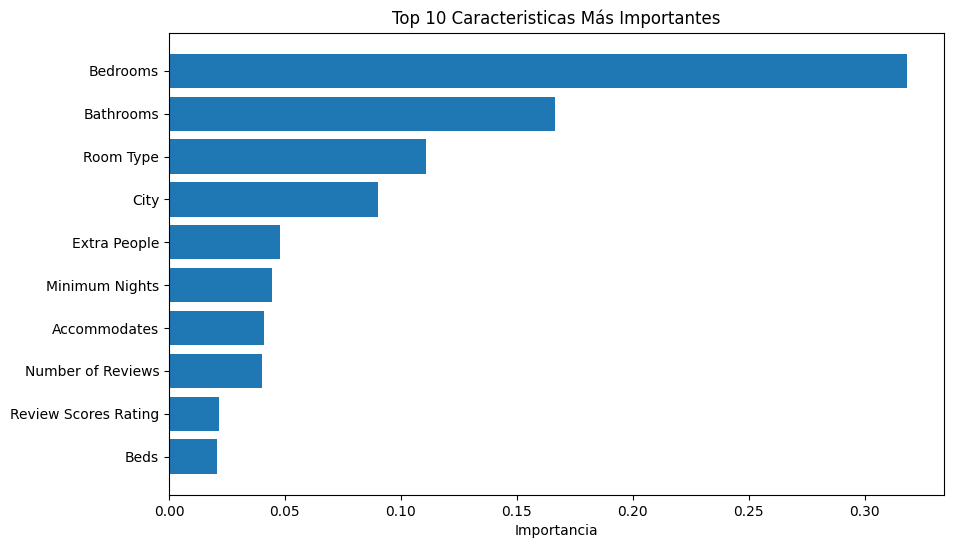

In [20]:
# Random Forest me permite ver qué variables son más importantes

# Saco las importancias
feature_names = X_train.columns
importancias = rf.feature_importances_

# Creo un DF para ordenarlas
df_importancias = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importancias
})
df_importancias = df_importancias.sort_values('Importance', ascending=False)

print("Importancia de cada variable:")
print(df_importancias)

# Visualizo las top 10
plt.figure(figsize=(10, 6))
top_10 = df_importancias.head(10)
plt.barh(top_10['Feature'], top_10['Importance'])
plt.xlabel('Importancia')
plt.title('Top 10 Caracteristicas Más Importantes')
plt.gca().invert_yaxis()  # para que la más importante esté arriba
plt.show()


Comparación de modelos


In [21]:
# Ahora comparo todos los modelos para ver cuál es mejor

print("\n" + "=" * 70)
print("COMPARACIÓN DE TODOS LOS MODELOS")
print("=" * 70)
print()

# Tabla resumen
print("Modelo                  | RMSE Train | RMSE Test  | R2 Test")
print("-" * 70)
print("1. Regresión Lineal     |  {:.2f}  |  {:.2f}  | {:.4f}".format(rmse_train_lr, rmse_test_lr, r2_test_lr))
print("2. Lasso                |  {:.2f}  |  {:.2f}  | {:.4f}".format(rmse_train_lasso, rmse_test_lasso, r2_test_lasso))
print("3. Árbol de Decisión    |  {:.2f}  |  {:.2f}  | {:.4f}".format(rmse_train_tree, rmse_test_tree, r2_test_tree))
print("4. Random Forest        |  {:.2f}  |  {:.2f}  | {:.4f}".format(rmse_train_rf, rmse_test_rf, r2_test_rf))
print("=" * 70)



COMPARACIÓN DE TODOS LOS MODELOS

Modelo                  | RMSE Train | RMSE Test  | R2 Test
----------------------------------------------------------------------
1. Regresión Lineal     |  38.06  |  35.98  | 0.4979
2. Lasso                |  38.06  |  35.97  | 0.4981
3. Árbol de Decisión    |  26.70  |  34.48  | 0.5389
4. Random Forest        |  18.92  |  30.28  | 0.6445


In [ ]:
# Visualizo la comparación con un gráfico de barras
modelos = ['Reg. Lineal', 'Lasso', 'Árbol', 'Random Forest']
rmse_test_vals = [rmse_test_lr, rmse_test_lasso, rmse_test_tree, rmse_test_rf]
r2_test_vals = [r2_test_lr, r2_test_lasso, r2_test_tree, r2_test_rf]

plt.figure(figsize=(12, 5))

# Gráfico de RMSE
plt.subplot(1, 2, 1)
plt.bar(modelos, rmse_test_vals, color=['blue', 'orange', 'green', 'red'], alpha=0.7)
plt.ylabel('RMSE (Test)')
plt.title('Comparación de RMSE en Test')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Gráfico de R2
plt.subplot(1, 2, 2)
plt.bar(modelos, r2_test_vals, color=['blue', 'orange', 'green', 'red'], alpha=0.7)
plt.ylabel('R² (Test)')
plt.title('Comparación de R² en Test')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
